<a href="https://colab.research.google.com/github/mishraji900/Prodigy_ml_03/blob/main/dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import necessary packages**

In [ ]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:51<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# **Initialize models**

In [ ]:
#generators divides the data in packages
train_df=keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)
test_df=keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# normalization
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_df = train_df.map(process)
test_df = test_df.map(process)

## **CNN model**

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_df,epochs=10,validation_data=test_df)

Epoch 1/10
625/625 [==============================] - 76s 115ms/step - loss: 1.3738 - accuracy: 0.5820 - val_loss: 0.7158 - val_accuracy: 0.5774
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5738 - accuracy: 0.6984 - val_loss: 0.5881 - val_accuracy: 0.7046
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5024 - accuracy: 0.7445 - val_loss: 0.6817 - val_accuracy: 0.6862
Epoch 4/10
625/625 [==============================] - 71s 113ms/step - loss: 0.4421 - accuracy: 0.7886 - val_loss: 0.4483 - val_accuracy: 0.7996
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3807 - accuracy: 0.8231 - val_loss: 0.5904 - val_accuracy: 0.7534
Epoch 6/10
625/625 [==============================] - 70s 112ms/step - loss: 0.3319 - accuracy: 0.8497 - val_loss: 0.6951 - val_accuracy: 0.7508
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2830 - accuracy: 0.8704 - val_loss: 0.5864 - val_ac

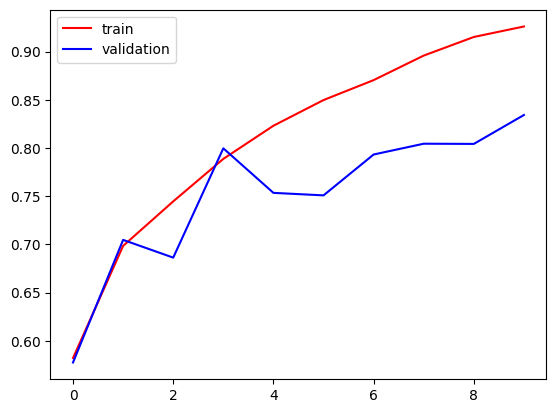

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

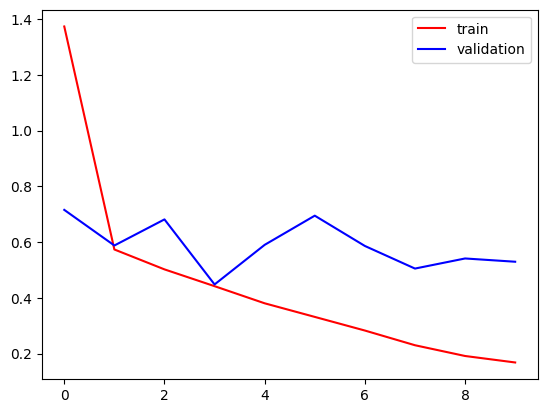

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/Cat_November_2010-1a.jpg.webp')

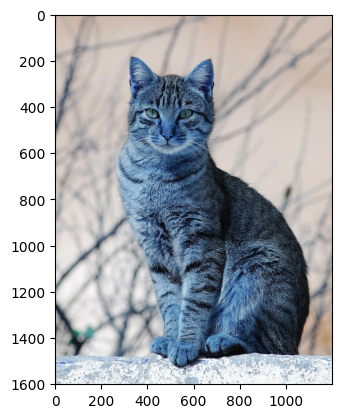

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1602, 1200, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
p = model.predict(test_input)

if p == 0:
    print('It\'s a dog')
else:
    print('It\'s a cat')


1/1 [==============================] - 0s 21ms/step
It's a cat
